In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("../data/raw/quikr_car.csv")

df.head()


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [2]:
import os
os.getcwd()


'C:\\Users\\Omii\\Github\\Car_Price_Prediction_Model\\notebooks'

In [3]:
os.listdir("..")


['data', 'notebooks', 'src']

In [4]:
os.listdir("../data")


['raw']

In [5]:
os.listdir("../data/raw")


['quikr_car (1).csv']

In [7]:
df.shape


(892, 6)

In [8]:
df.columns


Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [10]:
df.describe(include="all")


,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [11]:
df['year'].unique()[:20]


array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003'], dtype=object)

In [12]:
df = df[df['year'].str.isnumeric()]


In [13]:
df['year'] = df['year'].astype(int)


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [16]:
df = df[df['Price'] != 'Ask For Price']


In [17]:
df['Price'] = df['Price'].str.replace(',', '').astype(int)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [21]:
df['kms_driven'] = df['kms_driven'].str.split().str.get(0).str.replace(',', '')


In [24]:
df = df[df['kms_driven'].str.isnumeric()]


In [25]:
df['kms_driven'] = df['kms_driven'].astype(int)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [27]:
df = df[~df['fuel_type'].isna()]


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [32]:
df.to_csv("../data/processed/cleaned_car_data.csv", index=False)


In [30]:
import os
os.makedirs("../data/processed", exist_ok=True)


In [31]:
df.to_csv("../data/processed/cleaned_car_data.csv", index=False)


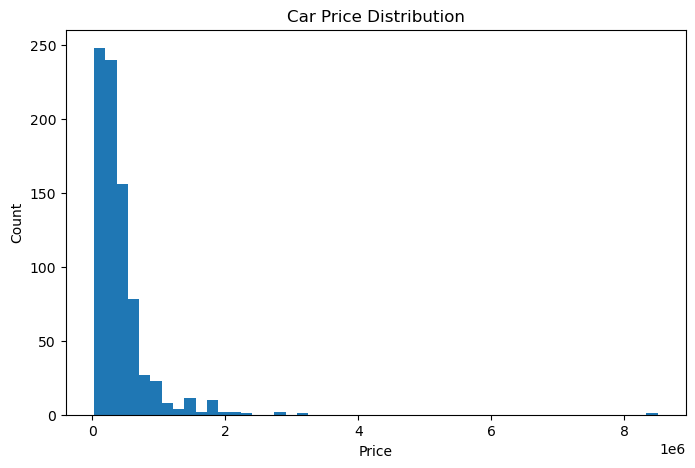

In [33]:
plt.figure(figsize=(8,5))
plt.hist(df['Price'], bins=50)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Car Price Distribution")
plt.show()


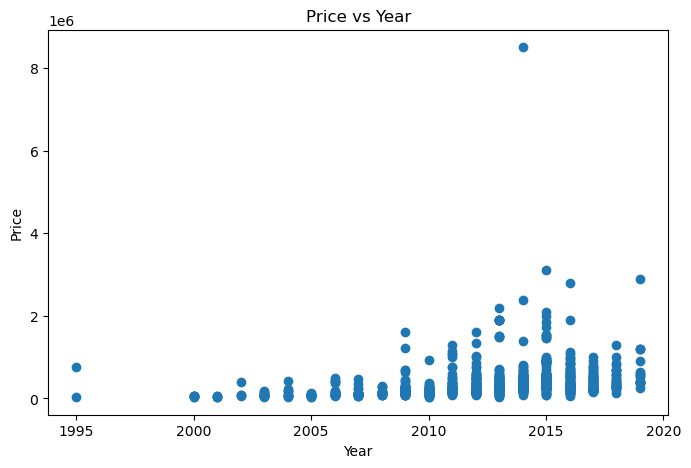

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['Price'])
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Price vs Year")
plt.show()


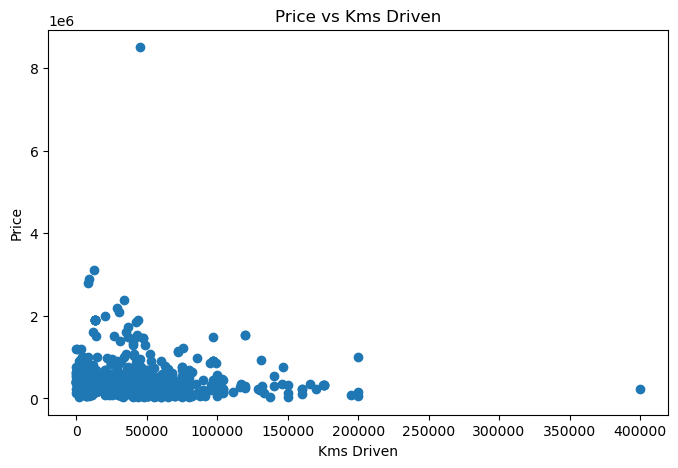

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(df['kms_driven'], df['Price'])
plt.xlabel("Kms Driven")
plt.ylabel("Price")
plt.title("Price vs Kms Driven")
plt.show()


In [36]:
import pandas as pd

df = pd.read_csv("../data/processed/cleaned_car_data.csv")


In [37]:
X = df[['name', 'company', 'year', 'kms_driven', 'fuel_type']]
y = df['Price']


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ['name', 'company', 'fuel_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)


In [40]:
from sklearn.metrics import r2_score

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_score(y_test, y_pred)


0.18990922466862614

In [41]:
import pickle
import os

os.makedirs("../models", exist_ok=True)

with open("../models/linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [42]:
sample_input = pd.DataFrame([{
    'name': 'Maruti Suzuki Swift',
    'company': 'Maruti',
    'year': 2019,
    'kms_driven': 30000,
    'fuel_type': 'Petrol'
}])

model.predict(sample_input)


array([472011.08112953])